# Original N-Airports

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

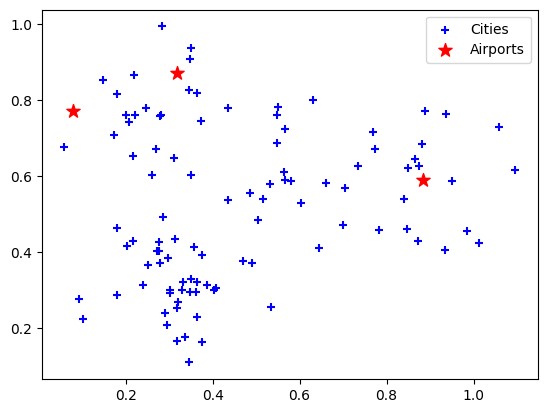

In [870]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [871]:
# Add alpha/learning rate variable, works best at .01
alpha = .01

# Find the distance between city and airport

In [872]:
def distance(city, airport):
    x = (airport[0] - city[0])**2
    y = (airport[1] - city[1])**2
    return x+y

# Create clusters

In [873]:
# Function to create initial clusters with airports and assign cities to closest airport
def create_clusters(cities, airports):
    clusters = []
    # Create a cluster for each airport
    for airport in airports:
        cluster = {'airport': airport, 'city': []}
        clusters.append(cluster)
    
    # Assign cities to the closest airport
    for city in cities:
        distances = {}
        for airport in airports:
            distances[airport] = distance(city, airport)
        
        # Find the closest airport to the current city based on the calculated distances
        closest_airport = min(distances, key=distances.get)
        # Add the city to the cluster of the closest airport
        for cluster in clusters:
            if cluster['airport'] == closest_airport:
                cluster['city'].append(city)
                break
        
    return clusters

In [874]:
# Function to calculate sum of distnaces between cities and airport
def cluster_score(cluster):
    airport = cluster['airport']
    cities = cluster['city']
    score = 0
    for city in cities:
        score += distance(city, airport)
    
    return score

In [875]:
# Calculates the partial derivative of the score function in relation to aiport's coordinates
def partial_derivative(cluster):
    airport = cluster['airport']
    x = sum(2 * (airport[0] - city[0]) for city in cluster['city'])
    y = sum(2 * (airport[1] - city[1]) for city in cluster['city'])
    return x, y

# Using Gradient Descent to update aiport coordinates

In [876]:
# Performs gradient descent to optimize clusters
def gradient_descent(clusters, alpha):
    for cluster in clusters:
        x, y = partial_derivative(cluster)
        # Update airport coordinates using gradient descent
        cluster['airport'] = (cluster['airport'][0] - alpha * x, cluster['airport'][1] - alpha * y)

# Calculate Objective Function

In [877]:
def objective(clusters):
    num = 0
    for cluster in clusters:
        num += cluster_score(cluster)
    
    return num

# Gradient Based Optimization Algorithm

In [878]:
def gradient_based_optimization(cities, airports, alpha):
    # Intial clusters
    clusters = create_clusters(cities, airports)
    # Store values and scores during optimization
    values = [(0, objective(clusters))]
    
    # Loop for optimization, until cost is no longer less than previous cost
    while True:
        previous_cost = values[-1][1]
        # Update clusters using gradient descent
        gradient_descent(clusters, alpha)
        # Update clusters based on new airport positions
        clusters = create_clusters(cities, [cluster['airport'] for cluster in clusters])
        cost = objective(clusters)
        # Append iteration number and cost
        values.append((values[-1][0] + 1, cost))
        
        if cost >= previous_cost:
            break
    # Extract new airport positions
    new_airports = [cluster['airport'] for cluster in clusters]
    return values, new_airports
values, new_airports = gradient_based_optimization(cities, airports, alpha)

# New Airport Map

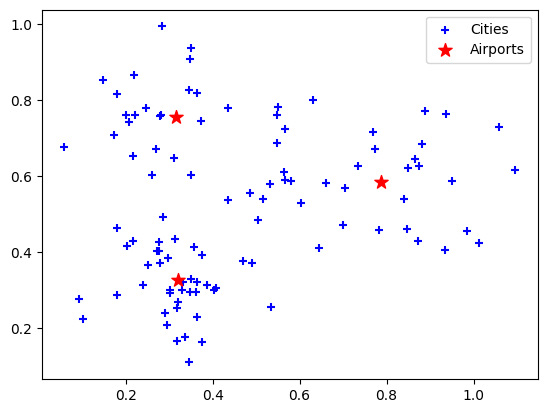

In [879]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_new_airs = zip(*new_airports)
plt.scatter(*zip_new_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.show()

# Values of the objective function at each iteration

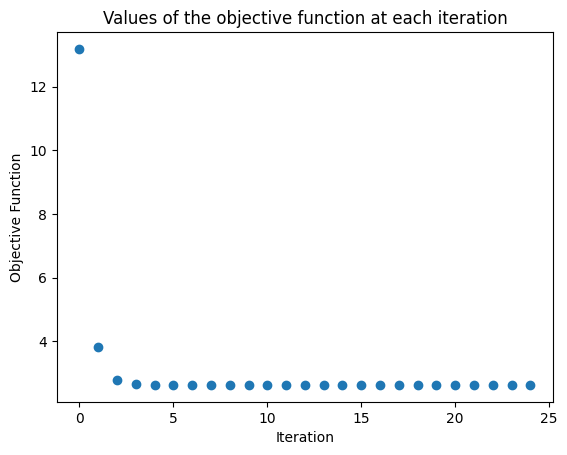

In [880]:
plt.scatter(*zip(*values), marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Values of the objective function at each iteration')
plt.show()